In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#fname = '.\data\hw\data_2015_1.txt'
fname = '../datasets/data_2015_1.txt'
data_cols = ['id','type','time']
data = pd.read_table(fname,sep='\t',header=None,names=data_cols)
data['amount'] = 1
data.head()

,id,type,time,amount
0,56498c50-84e4,flavor15,2015-01-01 19:03:32,1
1,56498c51-8cb9,flavor15,2015-01-01 19:03:34,1
2,56498c52-a50e,flavor8,2015-01-01 23:26:04,1
3,56498c53-a241,flavor2,2015-01-02 18:25:23,1
4,56498c54-8528,flavor8,2015-01-02 21:03:49,1


In [2]:
# 必要函数
def myvstack(up,down):
    return np.vstack((up,down))

def clearcount(data):
    type_list = list(set(data['type']))
    count_dict = dict()
    for i in range(len(type_list)):
        count_dict[type_list[i]]=[]
    return type_list,count_dict
    

In [3]:
data.isnull().sum()

id        0
type      0
time      0
amount    0
dtype: int64

In [4]:
data.dtypes

id        object
type      object
time      object
amount     int64
dtype: object

In [8]:
data['time'] = pd.to_datetime(data['time'])
data.head()

,id,type,time,amount
0,56498c50-84e4,flavor15,2015-01-01 19:03:32,1
1,56498c51-8cb9,flavor15,2015-01-01 19:03:34,1
2,56498c52-a50e,flavor8,2015-01-01 23:26:04,1
3,56498c53-a241,flavor2,2015-01-02 18:25:23,1
4,56498c54-8528,flavor8,2015-01-02 21:03:49,1


In [9]:
#创造型号列表用于索引每周统计数据
type_list = list(set(data['type']))
count_dict = dict()
for i in range(len(type_list)):
    count_dict[type_list[i]]=[]

In [10]:
# 创造每周时间范围，用于产生统计周期
i=1
k=1
time_arr = []
start_date = datetime(2015, 1, 1)
while(start_date<data.time.max()):
    end_date = start_date + timedelta(7)
    #print(start_date,end_date)
    time_arr.append([start_date,end_date])
    start_date = end_date
    i=i+1
    if i>50:
        break
time_arr

[[datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2015, 1, 8, 0, 0)],
 [datetime.datetime(2015, 1, 8, 0, 0), datetime.datetime(2015, 1, 15, 0, 0)],
 [datetime.datetime(2015, 1, 15, 0, 0), datetime.datetime(2015, 1, 22, 0, 0)],
 [datetime.datetime(2015, 1, 22, 0, 0), datetime.datetime(2015, 1, 29, 0, 0)],
 [datetime.datetime(2015, 1, 29, 0, 0), datetime.datetime(2015, 2, 5, 0, 0)]]

In [ ]:
# 清空已统计的数据
type_list, count_dict = clearcount(data)

In [11]:
# 统计各类型的数据并画出时间序列图
time_arr = np.array(time_arr)
for i in range(len(time_arr)):
    week_i=data[(time_arr[i,0] <= data.time) & (data.time <= time_arr[i,1])]
    for j in range(len(type_list)):
        count_dict[type_list[j]].append(week_i.loc[week_i.type==type_list[j]].count().amount)
weekly_data = pd.DataFrame(count_dict,index=time_arr[:,0])

In [75]:
weekly_data

2015-01-01    28
2015-01-08    81
2015-01-15    56
2015-01-22    23
2015-01-29     6
dtype: int64

In [77]:
weeksum = weekly_data.sum(axis=1)
datecsv = pd.DataFrame(time_arr[:,0],columns=['date'])
date_length = datecsv.count().date
weekcsv = weeksum.to_frame(name='sale').set_index(np.arange(date_length))
save = pd.concat([datecsv, weekcsv], axis=1)  
save.to_csv('weeksum.csv',index=False,sep=',')

In [76]:
time_arr[0,0]

datetime.datetime(2015, 1, 1, 0, 0)

In [45]:
# #创造每周时间范围，用于产生统计周期
# 旧方法
# from datetime import datetime
# i=1
# time_arr = np.empty((1,2))
# start_date = datetime(2015, 1, i)
# while(start_date<data.time.max()):
#     j=i+7
#     start_date = datetime(2015, 1, i)
#     if j<31:
#         end_date = datetime(2015, 1, j)
#     else:
#         end_date = datetime(2015, 1, 31, 23, 59, 59)
#     print(i,j,start_date,end_date)
#     time_arr = np.vstack((time_arr,np.array((start_date,end_date))))
#     start_date = end_date
#     i=j

1 8 2015-01-01 00:00:00 2015-01-08 00:00:00
8 15 2015-01-08 00:00:00 2015-01-15 00:00:00
15 22 2015-01-15 00:00:00 2015-01-22 00:00:00
22 29 2015-01-22 00:00:00 2015-01-29 00:00:00
29 36 2015-01-29 00:00:00 2015-01-31 23:59:59


array([[1.1024774924674e-311, 1.102488682177e-311],
       [datetime.datetime(2015, 1, 1, 0, 0),
        datetime.datetime(2015, 1, 8, 0, 0)],
       [datetime.datetime(2015, 1, 8, 0, 0),
        datetime.datetime(2015, 1, 15, 0, 0)],
       [datetime.datetime(2015, 1, 15, 0, 0),
        datetime.datetime(2015, 1, 22, 0, 0)],
       [datetime.datetime(2015, 1, 22, 0, 0),
        datetime.datetime(2015, 1, 29, 0, 0)],
       [datetime.datetime(2015, 1, 29, 0, 0),
        datetime.datetime(2015, 1, 31, 23, 59, 59)]], dtype=object)

In [125]:
for i in range(len(time_arr)-1):
    week_i=data[(time_arr[i+1,0] <= data.time) & (data.time <= time_arr[i+1,1])]
    for j in range(len(type_list)):
        count_dict[type_list[j]].append(week_i.loc[week_i.type==type_list[j]].count().amount)

In [127]:
weekly_data = pd.DataFrame(count_dict,index=time_arr[1:,0])

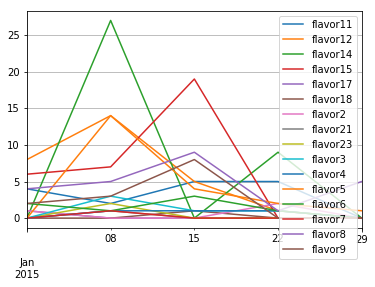

In [129]:
%matplotlib inline
weekly_data.plot(grid='on')

In [57]:
weak_table_cols = list(week1.index)

In [59]:
import numpy as np
arr = np.random.rand(4, 8)
arr

array([[ 0.57168759,  0.95465622,  0.10689101,  0.3939244 ,  0.53082908,
         0.10717887,  0.90828874,  0.53498258],
       [ 0.55279148,  0.48062714,  0.68937577,  0.84968834,  0.97285856,
         0.42894707,  0.57687962,  0.96541397],
       [ 0.52415657,  0.49517522,  0.58067996,  0.91404039,  0.44925304,
         0.85894595,  0.36303994,  0.11367631],
       [ 0.8321577 ,  0.23166912,  0.18872649,  0.49439616,  0.99809149,
         0.82113859,  0.19748263,  0.80286244]])

In [68]:

arr2 = np.vstack((arr, arr))

In [73]:
arr1=np.array([arr,arr])

In [86]:
arr3 = myvstack(arr,arr)
pd.DataFrame(arr3, columns=weak_table_cols )

,flavor11,flavor12,flavor15,flavor17,flavor2,flavor6,flavor8,flavor9
0,4,8,6,1,1,2,4,2
1,4,8,6,1,1,2,4,2


In [46]:
testStationarity(diff_12_1)
data.head()

,time,id,type,amount
0,2015-01-01 19:03:32,56498c50-84e4,flavor15,1
1,2015-01-01 19:03:34,56498c51-8cb9,flavor15,1
2,2015-01-01 23:26:04,56498c52-a50e,flavor8,1
3,2015-01-02 18:25:23,56498c53-a241,flavor2,1
4,2015-01-02 21:03:49,56498c54-8528,flavor8,1


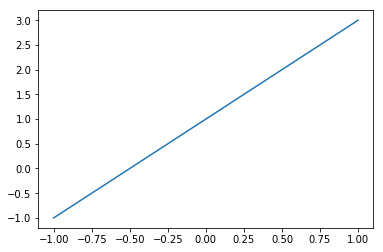

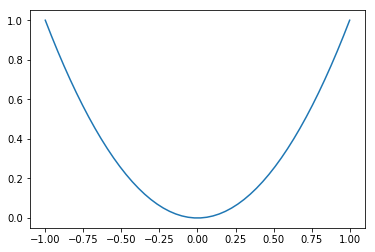

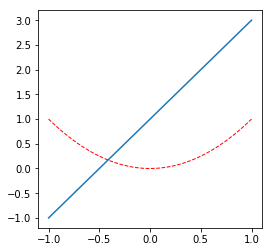

In [140]:
import matplotlib.pyplot as plt
# figure的使用
x = np.linspace(-1, 1, 50)
y1 = 2 * x + 1

# figure 1
plt.figure()
plt.plot(x, y1)


# figure 2
y2 = x**2
plt.figure()
plt.plot(x, y2)


# figure 3，指定figure的编号并指定figure的大小, 指定线的颜色, 宽度和类型
y2 = x**2
plt.figure(num = 5, figsize = (4, 4))
plt.plot(x, y1)
plt.plot(x, y2, color = 'red', linewidth = 1.0, linestyle = '--')
plt.show()